In [58]:
# Importar las librerías
import pandas as pd

import numpy as np

import seaborn as sns
sns.set_theme(style="whitegrid")

import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# No muestra warnings
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = (12,  6)


In [59]:

file_path = 'https://raw.githubusercontent.com/Jcamgom/ExploratoryDataAnalysis/refs/heads/main/hotel_bookings_clean.csv'
df = pd.read_csv(file_path, sep=',',  na_values='?')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# Duplicated variables?

df.duplicated().sum()

32046

In [63]:
# Eliminamos las coulumnas que no usamos

df = df.drop(columns=(['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
    'arrival_date_day_of_month', 'meal', 'country', 'market_segment',
    'distribution_channel', 'reserved_room_type', 'assigned_room_type',
    'deposit_type', 'agent', 'customer_type', 'reservation_status',
    'reservation_status_date']))

KeyError: "['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'customer_type', 'reservation_status', 'reservation_status_date'] not found in axis"

In [64]:
# Verificar las columnas restantes
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


In [27]:
# Observamos los altos valores en las columnas
df.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.855072,0.062518,0.571363
std,0.482918,106.863097,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.540938,0.245291,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000
50%,0.000000,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [28]:
#Función para calcular IQR

def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[ ((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))) ]
   return outliers

In [29]:
outliers = find_outliers_IQR(df['lead_time'])

print('número de outliers: '+ str(len(outliers)))
print('max valor outlier: ' + str(outliers.max()))
print('min valor outlier: ' + str(outliers.min()))

print(outliers)

número de outliers: 3005
max valor outlier: 737
min valor outlier: 374
1         737
225       394
890       460
1516      381
1672      382
         ... 
119102    518
119107    518
119109    518
119111    518
119148    457
Name: lead_time, Length: 3005, dtype: int64


In [30]:
# Crera una función para para encontrar outliers con  IQR

def drop_outliers_IQR(df):

   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1

   # No outliers
   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   # datos limpios
   outliers_clean = not_outliers.dropna().reset_index()

   return outliers_clean

In [31]:
# LLamamos la función

outliers_clean = drop_outliers_IQR(df['lead_time'])

print('number of outliers: '+ str(len(outliers_clean)))
print('max outlier value: ' + str(outliers_clean.max()))
print('min outlier value: ' + str(outliers_clean.min()))
print(outliers_clean)

number of outliers: 116385
max outlier value: index        119389
lead_time       373
dtype: int64
min outlier value: index        0
lead_time    0
dtype: int64
         index  lead_time
0            0        342
1            2          7
2            3         13
3            4         14
4            5         14
...        ...        ...
116380  119385         23
116381  119386        102
116382  119387         34
116383  119388        109
116384  119389        205

[116385 rows x 2 columns]


In [32]:
type(outliers)

pandas.core.series.Series

In [33]:
outliers = find_outliers_IQR(df['lead_time'])

print('número de outliers: '+ str(len(outliers)))
print('max valor outlier: ' + str(outliers.max()))
print('min valor outlier: ' + str(outliers.min()))

print(outliers)

número de outliers: 3005
max valor outlier: 737
min valor outlier: 374
1         737
225       394
890       460
1516      381
1672      382
         ... 
119102    518
119107    518
119109    518
119111    518
119148    457
Name: lead_time, Length: 3005, dtype: int64


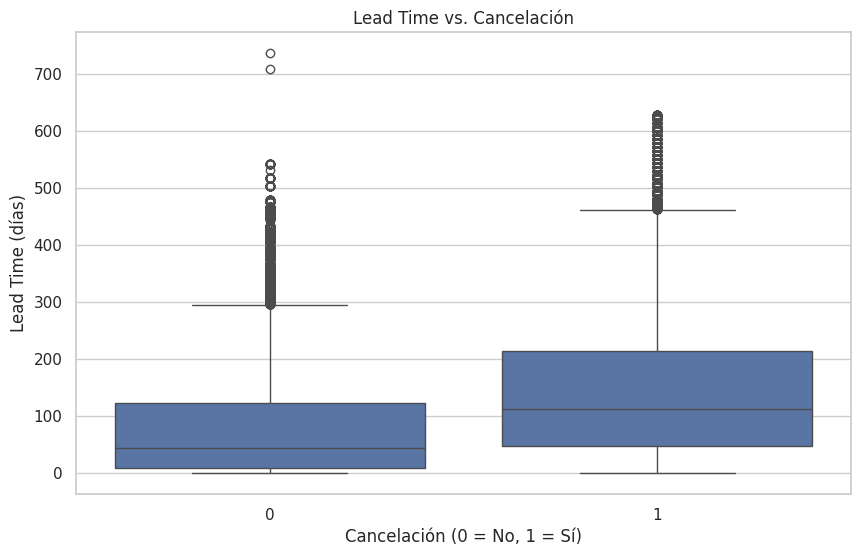

In [47]:
# Análisis bivariado: lead_time vs. is_canceled
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time vs. Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Lead Time (días)')
plt.show()

Las reservas con un mayor tiempo de anticipación tienden a tener una mayor probabilidad de cancelación.

###Como los outliers estan afectando las graficas, se limitara el rango

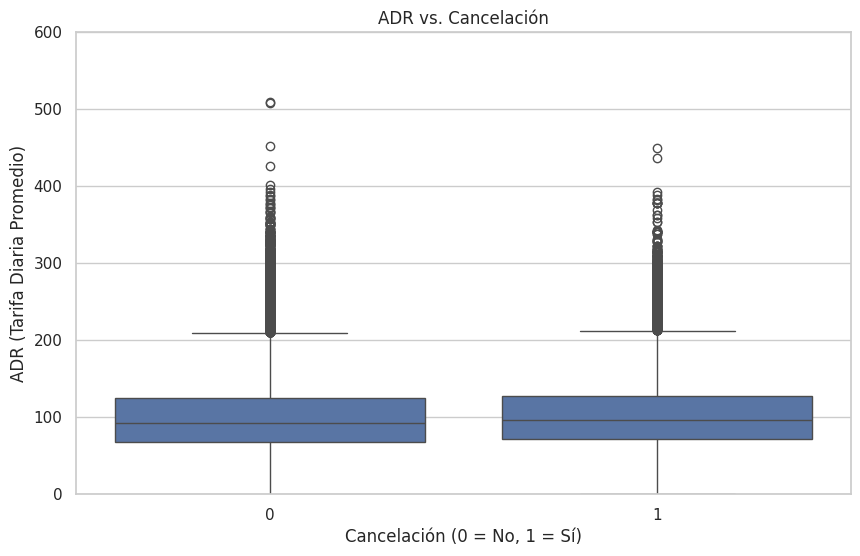

In [55]:
# Análisis bivariado: adr vs. is_canceled
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_canceled', y='adr', data=df)
plt.title('ADR vs. Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('ADR (Tarifa Diaria Promedio)')

# Limitar el eje y a un máximo de 1000
plt.ylim(0, 600)

plt.show()

No hay una relación significativa

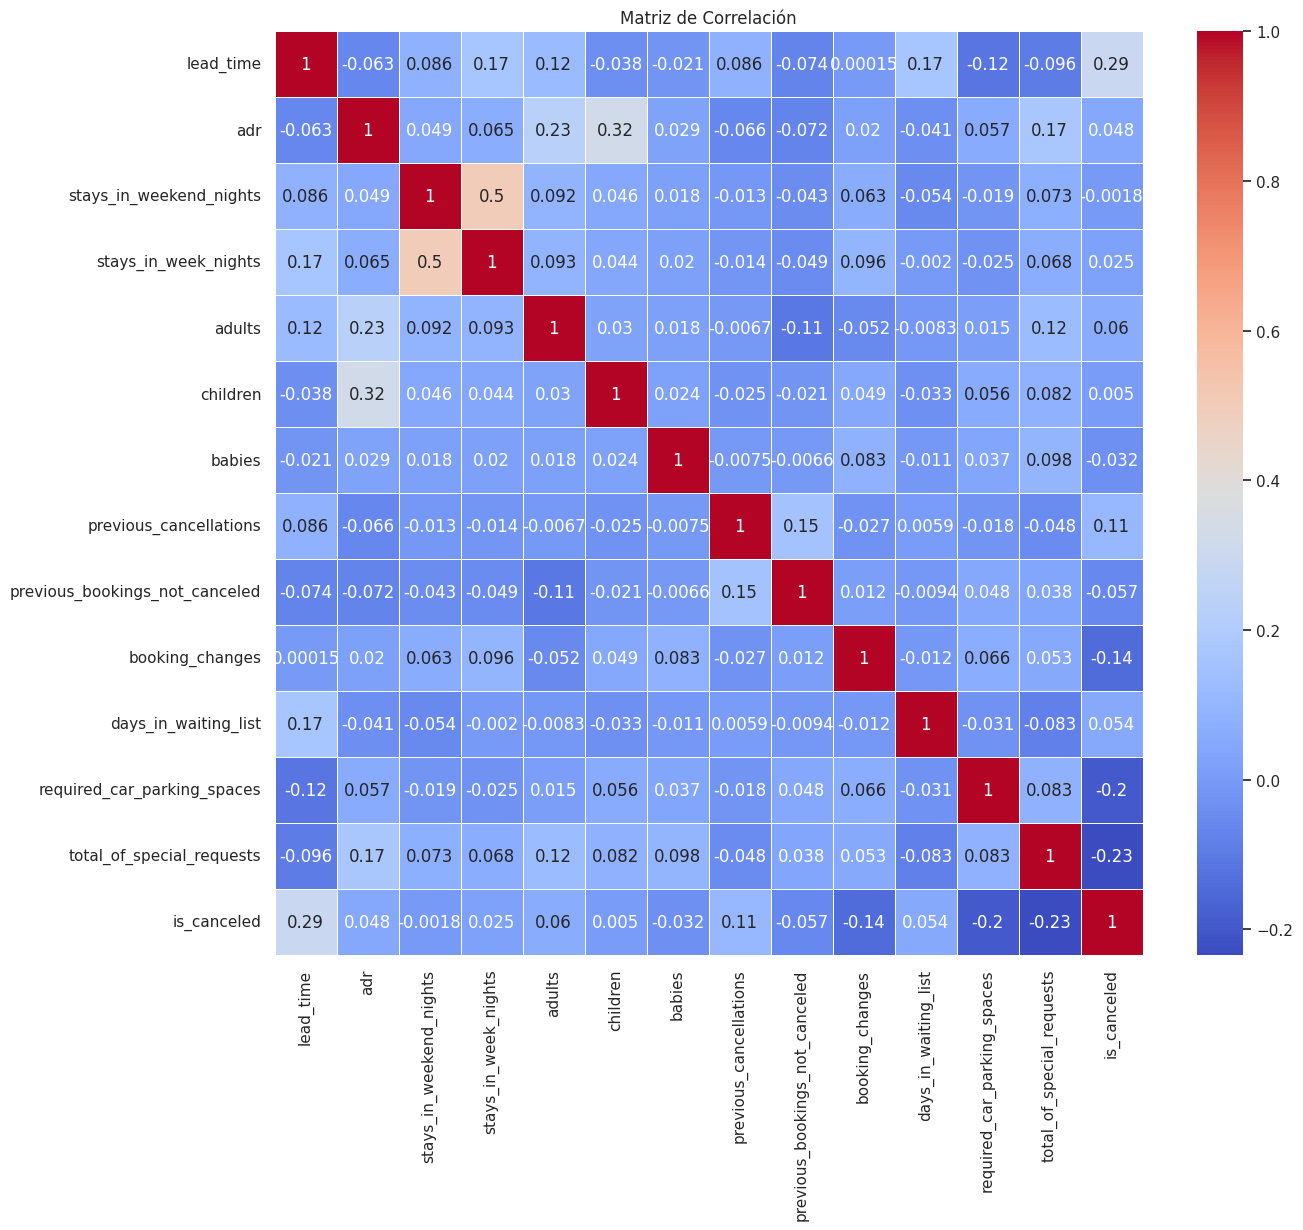

              precision    recall  f1-score   support

           0       0.74      0.88      0.81     22478
           1       0.71      0.49      0.58     13339

    accuracy                           0.73     35817
   macro avg       0.73      0.68      0.69     35817
weighted avg       0.73      0.73      0.72     35817

[[19803  2675]
 [ 6857  6482]]


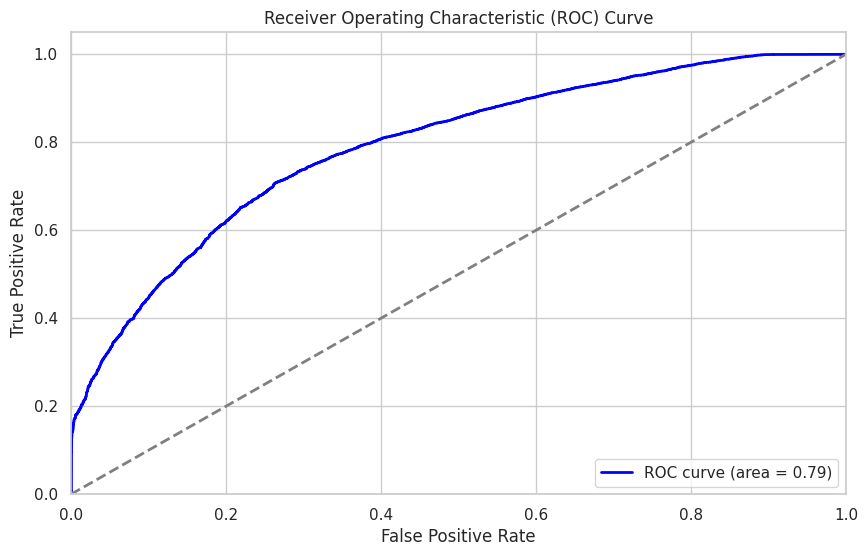

In [65]:
# Seleccionar las variables de interés
variables = [
    'lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'previous_cancellations',
    'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
    'required_car_parking_spaces', 'total_of_special_requests', 'is_canceled'
    ]

df_clean = df[variables].dropna()

# Matriz de correlación
plt.figure(figsize=(14, 12))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_clean.drop('is_canceled', axis=1)
y = df_clean['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluar el modelo
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Matriz de correlación
En la matriz tenemos dos valores destacables de correlacion debil: Tiempo de anticipación y cancelación lo que sugiere que las reservas con mayor tiempo de anticipación tienen una mayor probabilidad de ser canceladas.

Cancelaciones previas y cancelación lo que sugiere que los clientes con cancelaciones previas tienen una mayor probabilidad de cancelar nuevamente.

Adema requerimientos especiales y cancelación tuvieron correlación negativa debil, lo que sugiere que entre mas requerimientos tenga la persona, menor sera su probabilidad de cancelar.

###Curva ROC (Receiver Operating Characteristic)
Muestra un área bajo la curva de 0.79, lo que indica una buena capacidad del modelo para distinguir entre reservas canceladas y no canceladas.

###Conclusion

Las reservas con mayor tiempo de anticipación muestran una mayor probabilidad de ser canceladas, lo que sugiere que las personas que reservan con antelación tienden a cambiar sus planes con mayor frecuencia. De manera similar, los clientes que ya han cancelado previamente tienen una mayor probabilidad de volver a cancelar, destacando un patrón de comportamiento repetitivo. Por otro lado, aquellos que realizan requerimientos especiales parecen ser más propensos a mantener su reserva, ya que, a medida que aumentan sus solicitudes, disminuye ligeramente la probabilidad de cancelación. En conjunto, el modelo demuestra una buena capacidad para predecir con precisión qué reservas tienen mayor riesgo de cancelación.